<a href="https://colab.research.google.com/github/s2315/KNN/blob/main/KNN_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
df= pd.read_csv("alpha_theta_temporal_data.csv")

In [ ]:
df.shape

(8572, 5)

In [ ]:
df.head()

,2_T7,2_T8,3_T7,3_T8,Label
0,0.444,0.483,0.798,0.864,1.0
1,0.905,0.549,0.527,1.010,1.0
2,0.572,2.550,0.864,0.929,1.0
3,0.349,0.592,0.643,1.200,1.0
4,0.469,0.494,1.030,1.280,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


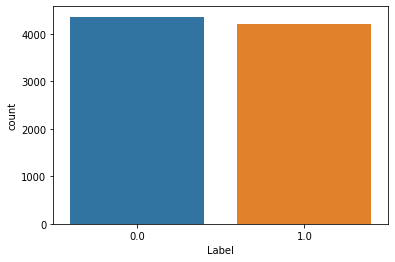

In [ ]:
sns.countplot(df['Label'])

In [ ]:
knn = KNeighborsClassifier()
#Create x and y variables.
x = df.drop(columns=['Label'])
y = df['Label']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
knn.fit(x_train, y_train)
#Predict test data set.
y_pred = knn.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.77       894
         1.0       0.73      0.80      0.77       821

    accuracy                           0.77      1715
   macro avg       0.77      0.77      0.77      1715
weighted avg       0.77      0.77      0.77      1715



0.767012182992858

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 8
Best p: 1
Best n_neighbors: 23


In [ ]:
from sklearn.metrics import *
test_prediction= best_model.predict(x_test)
train_prediction= best_model.predict(x_train)
prob_test = np.squeeze(best_model.predict_proba(x_test)[:,1].reshape(1,-1))

test_acc=accuracy_score(y_test,test_prediction)
train_acc=accuracy_score(y_train,train_prediction)
print("train_acc %0.3f" %(train_acc*100))
print("test_acc %0.3f" %(test_acc*100))


print("Confusion Matrix:")
print(confusion_matrix(y_test, test_prediction))

print("Classification Report:")
print(classification_report(y_test, test_prediction))

roc_aucScore=roc_auc_score(y_test,test_prediction)
print("ROC_AUC_SCORE: %.2f" % (roc_aucScore))

error=log_loss(y_test.astype(np.float64),prob_test.astype(np.float64))
print("log_loss: %.2f "%(error))

jaccard = jaccard_score(y_test,test_prediction)
print("jaccard: %0.2f "%(jaccard))

hammingloss =hamming_loss(y_test,test_prediction)
print("hamming_loss: %0.4f " %(hammingloss)) 

f1_positive = f1_score(y_test, test_prediction, pos_label=1)
f1_negative = f1_score(y_test, test_prediction, pos_label=0)
print("f1_positive: %0.2f , f1_negative: %0.2f" %(f1_positive,f1_negative))

recall_sensitivity = recall_score(y_test, test_prediction, pos_label=1)
recall_specificity =recall_score(y_test, test_prediction, pos_label=0)
print("recall_sensitivity: %0.2f, recall_specificity: %0.2f" %(recall_sensitivity, recall_specificity))

precision_positive =precision_score(y_test, test_prediction, pos_label=1)
precision_negative = precision_score(y_test, test_prediction, pos_label=0)
print("precision_positive: %0.2f , precision_negative: %0.2f" %(precision_positive,precision_negative))

train_acc 79.977
test_acc 80.117
Confusion Matrix:
[[669 225]
 [116 705]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       894
         1.0       0.76      0.86      0.81       821

    accuracy                           0.80      1715
   macro avg       0.81      0.80      0.80      1715
weighted avg       0.81      0.80      0.80      1715

ROC_AUC_SCORE: 0.80
log_loss: 0.39 
jaccard: 0.67 
hamming_loss: 0.1988 
f1_positive: 0.81 , f1_negative: 0.80
recall_sensitivity: 0.86, recall_specificity: 0.75
precision_positive: 0.76 , precision_negative: 0.85
